In [1]:
using PyPlot, DynamicalSystems

### Using DynamicalSystems.jl

In [12]:
function f(dx, x, p, n)
    a = p[1]; b = p[2]
    dx[1] = exp(-a*x[1]^2) + b
    return dx
end

f (generic function with 1 method)

In [60]:
a = 1
ds = DiscreteDynamicalSystem(f, [0.0], [a, 1.0])
i = 1
pvalues = -1:0.0005:1
n = 1000
Ttr = 100
p_index = 2
output = orbitdiagram(ds, i, p_index, pvalues; n = n, Ttr = Ttr)

l = length(pvalues)
x = Vector{Float64}(undef, n*l)
y = copy(x)
for j in 1:l
    x[(1 + (j-1)*n):j*n] .= pvalues[j]
    y[(1 + (j-1)*n):j*n] .= output[j]
end

In [ ]:
figure(figsize = (15,8))
title("a = $a", fontsize=22)
plot(x, y, ls = "None", ms = 0.1, color = "black", marker = "o", alpha = 0.05)
xlim(pvalues[1], pvalues[end]); 
xlabel("b", fontsize=20); ylabel("x",fontsize=20)
tight_layout()
# savefig("q3.pdf")
xticks(fontsize=16)
yticks(fontsize=16)

savefig("plots/a$a.png", dpi=700)

### Q3 Lyapunov exponents

In [17]:
f(x, a, b) = exp(-a*x^2) + b
df(x) = -2*a*x*exp(-a*x^2)

df (generic function with 1 method)

In [29]:
a = 8
N = 10000
t = pvalues
X = zeros(length(t), N)
X[:, 1] = zeros(length(t)).+sqrt(2)/10
i = 1
for b in t
    for j in 2:N
        X[i, j] = f(X[i, j-1], a, b)
    end
    i += 1
end

In [30]:
L = sum(log.(abs.(df.(X))), dims=2)/N

4001×1 Array{Float64,2}:
 -5.2183392637683195
 -5.210743284020824 
 -5.203144147102572 
 -5.195539924810996 
 -5.187929481734655 
 -5.180312844677337 
 -5.172689622173615 
 -5.165054293934483 
 -5.1573931043891   
 -5.149695210290573 
 -5.1419510999371   
 -5.1340877300033085
 -5.125940853047902 
  ⋮                 
 -5.15189043842964  
 -5.159306033881188 
 -5.166726147390031 
 -5.174150777135401 
 -5.181579921292706 
 -5.189013578057567 
 -5.196451745623474 
 -5.203894422200421 
 -5.211341605996813 
 -5.218793295237757 
 -5.226249488152538 
 -5.233710182977775 

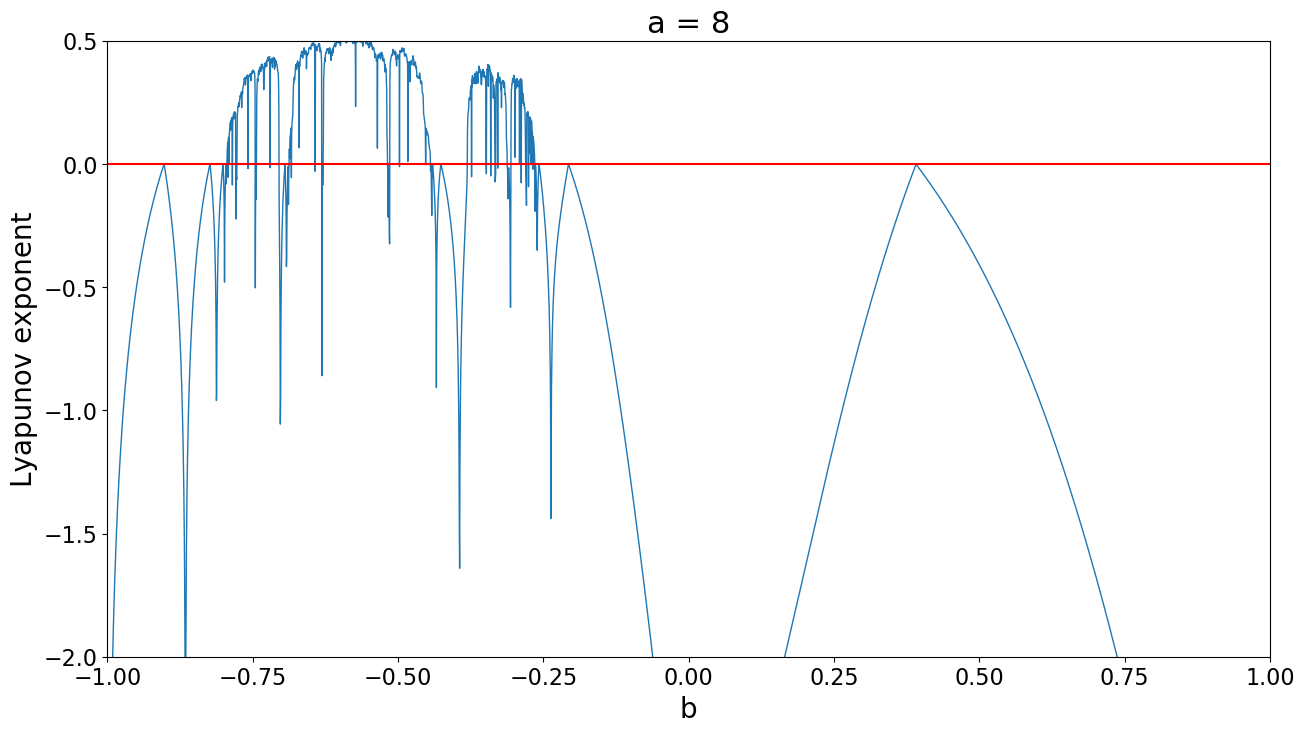

In [31]:
figure(figsize = (15,8))
title("a = $a", fontsize=22)
plot(t, L, linewidth=1)
axhline(0, color = "r")
ylim([-2, 0.5])
xlim([-1,1])
xlabel("b", fontsize=20)
ylabel("Lyapunov exponent",fontsize=20)
xticks(fontsize=16)
yticks(fontsize=16)

savefig("plots/lyapunov$a.png", dpi=700)

# Q4 

In [32]:
function g(dx, x, p, n)
    a, b, c, d = p
    dx[1] = x[1]^2 - x[2]^2 + a*x[1] + b*x[2]
    dx[2] = 2*x[1]*x[2] + c*x[1] + d*x[2]
    return dx
end

g (generic function with 1 method)

In [36]:
p = [0.9, -0.6013, 2, 0.5]
ds = DiscreteDynamicalSystem(g, [0.1, 0.1], p)

2-dimensional discrete dynamical system
 state:       [0.1, 0.1]
 e.o.m.:      g
 in-place?    true
 jacobian:    ForwardDiff
 parameters:  [0.9, -0.6013, 2.0, 0.5]

In [40]:
run = trajectory(ds, 100000);

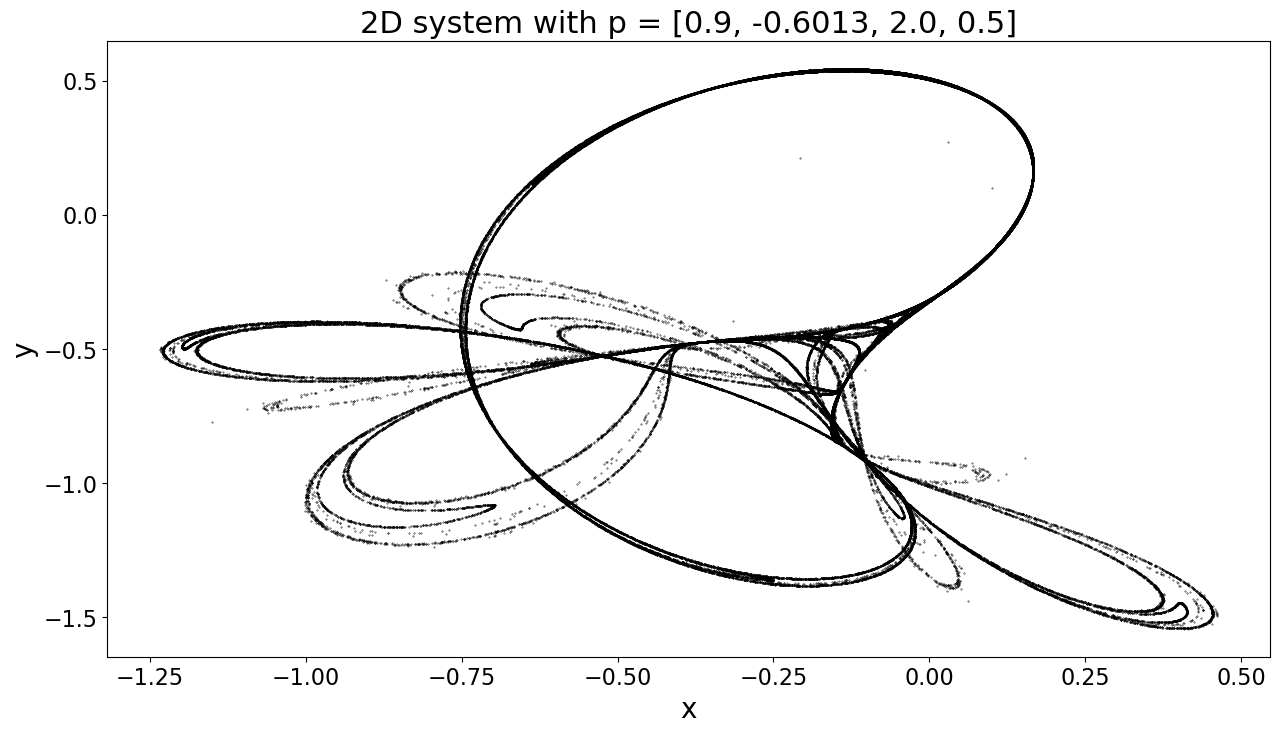

In [43]:
figure(figsize = (15,8))
scatter(run[:, 1], run[:, 2], s=0.1, color="k")
# plot(run[:, 1], run[:, 2])
title("2D system with p = $p", fontsize=22)
xlabel("x", fontsize=20)
ylabel("y",fontsize=20)
xticks(fontsize=16)
yticks(fontsize=16)

savefig("plots/q41.png", dpi=700)

In [58]:
p2 = [0.3, 0.6, 2, 0.27]
ds2 = DiscreteDynamicalSystem(g, [0.06, 0.5], p2)
run2 = trajectory(ds2, 10000)

2-dimensional Dataset{Float64} with 10001 points
 0.06       0.5     
 0.0716     0.315   
 0.116382   0.273358
 0.137749   0.370197
 0.145372   0.477441
 0.123259   0.558466
 0.0753659  0.534977
 0.0630757  0.375814
 0.107154   0.27503 
 0.133004   0.347506
 0.145335   0.452275
 0.131535   0.544246
 0.0871056  0.553191
 ⋮                  
 0.112345   0.279487
 0.135904   0.362948
 0.145279   0.468456
 0.126312   0.553153
 0.0797617  0.541715
 0.0618641  0.392203
 0.103885   0.27815 
 0.13148    0.340662
 0.145078   0.44452 
 0.133685   0.539156
 0.0907818  0.557096
 0.0593776  0.433128


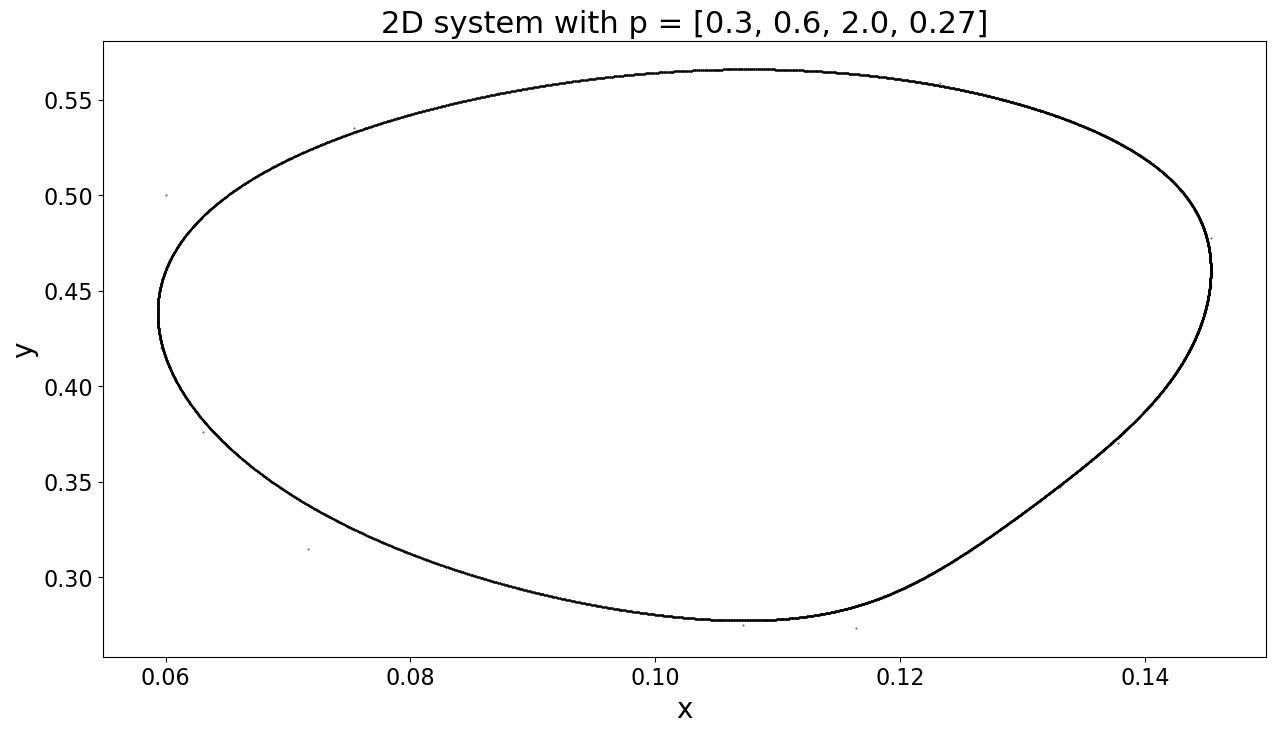

In [59]:
figure(figsize = (15,8))
scatter(run2[:, 1], run2[:, 2], s=0.1, color="k")
title("2D system with p = $p2", fontsize=22)
xlabel("x", fontsize=20)
ylabel("y",fontsize=20)
xticks(fontsize=16)
yticks(fontsize=16)

savefig("plots/q42.png", dpi=700)